# Data Understanding

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('term-deposit-marketing-2020.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [4]:
print("Data shape :",df.shape)

Data shape : (40000, 14)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [ ]:
df['job'].value_counts(ascending=True)

unknown           235
student           524
housemaid        1087
unemployed       1104
entrepreneur     1405
self-employed    1414
retired          1437
services         3910
admin            4483
technician       6852
management       8166
blue-collar      9383
Name: job, dtype: int64

In [6]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [7]:
df['y'].value_counts(ascending=True)

yes     2896
no     37104
Name: y, dtype: int64

In [8]:
column_names = df.columns
for column in column_names:
    print(column + ' - ' + str(df[column].isnull().sum()))

age - 0
job - 0
marital - 0
education - 0
default - 0
balance - 0
housing - 0
loan - 0
contact - 0
day - 0
month - 0
duration - 0
campaign - 0
y - 0


# Data Preprocessing

Feature Engineering

* Numerical Data Features


In [9]:

# for each column
for a in list(df.columns):
    
    # get a list of unique values
    n = df[a].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(a)
        print(n)
    else:
        print(a + ': ' +str(len(n)) + ' unique values')

age: 70 unique values
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
balance: 6849 unique values
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
day: 31 unique values
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']
duration: 1535 unique values
campaign: 48 unique values
y
['no' 'yes']


In [10]:
cols_num = ['campaign', 'duration',
       'balance', 'day', 'age']

In [12]:
df[cols_num].head()

,campaign,duration,balance,day,age
0,1,261,2143,5,58
1,1,151,29,5,44
2,1,76,2,5,33
3,1,92,1506,5,47
4,1,198,1,5,33


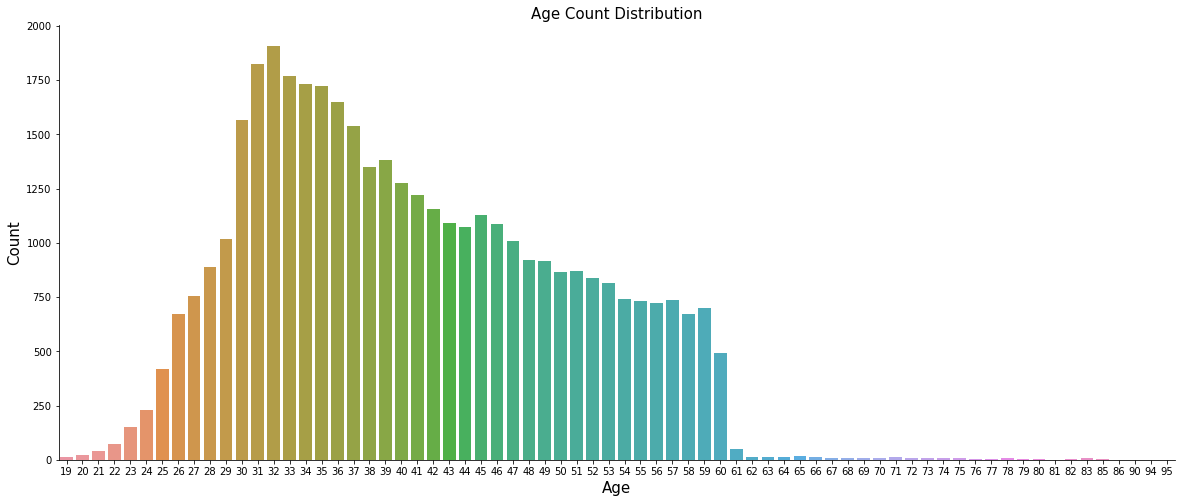

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data =  df[cols_num])
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

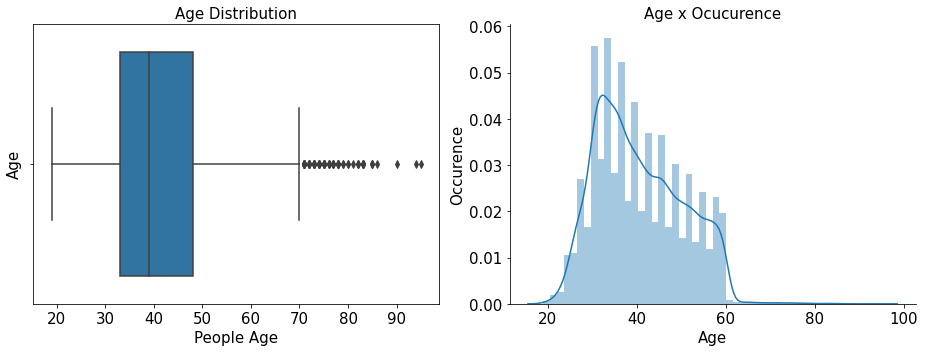

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = df[cols_num], orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df[cols_num]['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


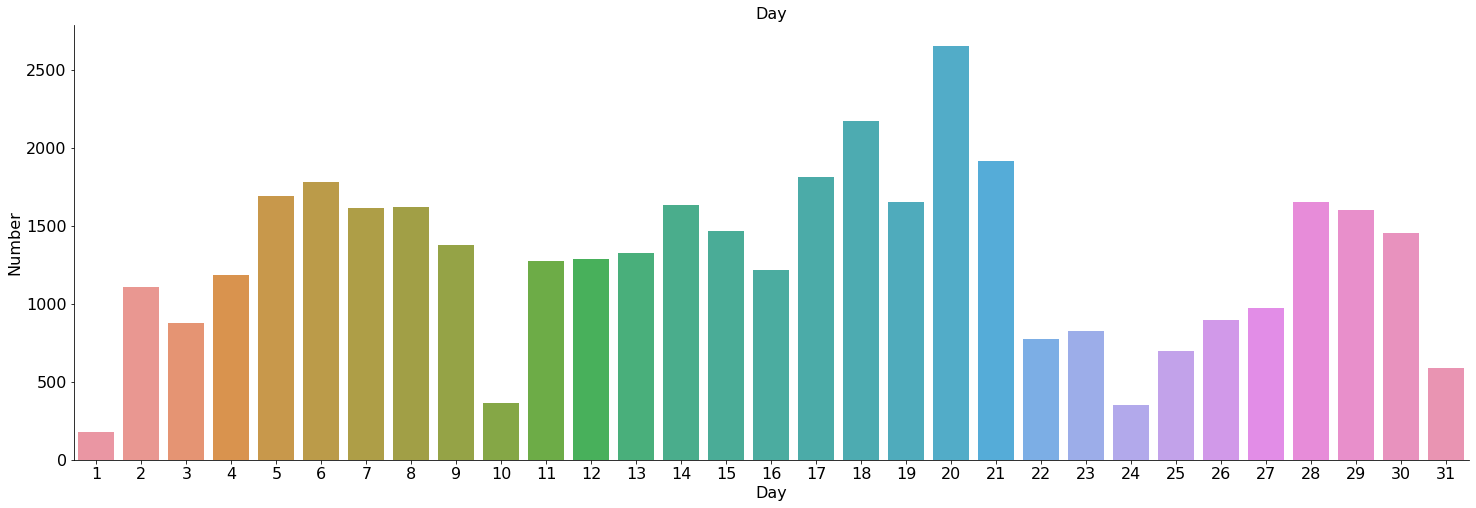

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'day', data = df[cols_num])
ax.set_xlabel('Day', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Day', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

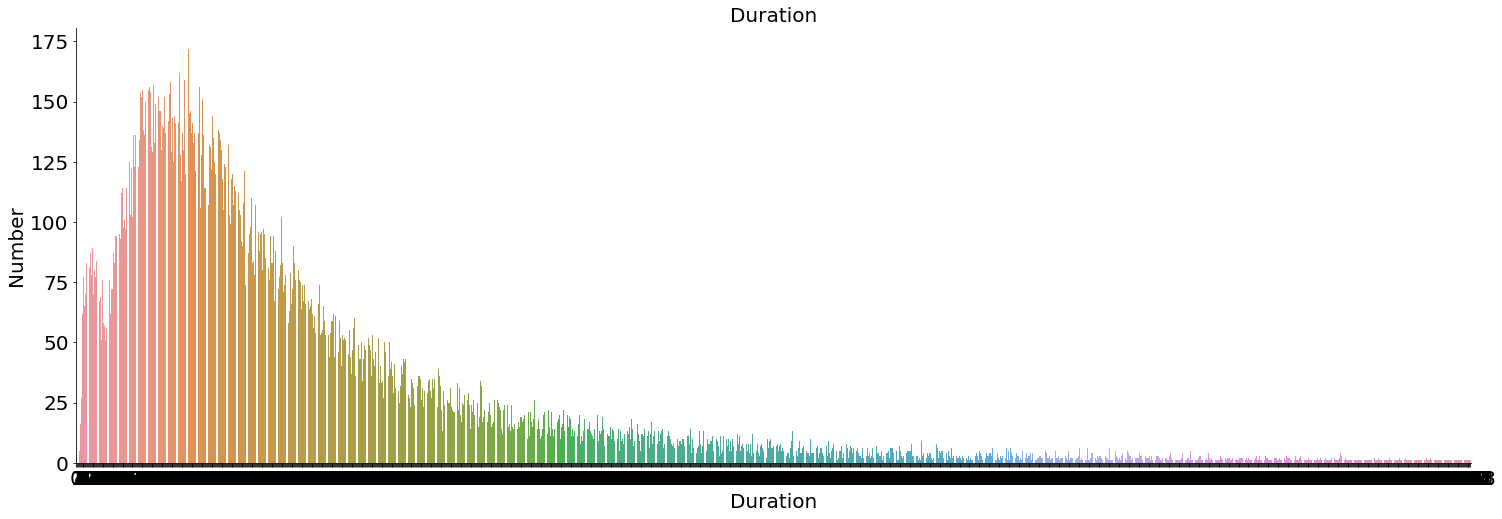

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'duration', data = df[cols_num])
ax.set_xlabel('Duration', fontsize=20)
ax.set_ylabel('Number', fontsize=20)
ax.set_title('Duration', fontsize=20)
ax.tick_params(labelsize=20)
sns.despine()

* Categorical Features

In [22]:
cols_cat = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'contact', 'month']

In [23]:
df[cols_cat].head()

,job,marital,education,default,housing,loan,contact,month
0,management,married,tertiary,no,yes,no,unknown,may
1,technician,single,secondary,no,yes,no,unknown,may
2,entrepreneur,married,secondary,no,yes,yes,unknown,may
3,blue-collar,married,unknown,no,yes,no,unknown,may
4,unknown,single,unknown,no,no,no,unknown,may


**One Hot Encoding**

In [24]:
cols_new_cat=pd.get_dummies(df[cols_cat],drop_first = False)
cols_new_cat.head()

,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


**Graphical Representation of Categorical Features**

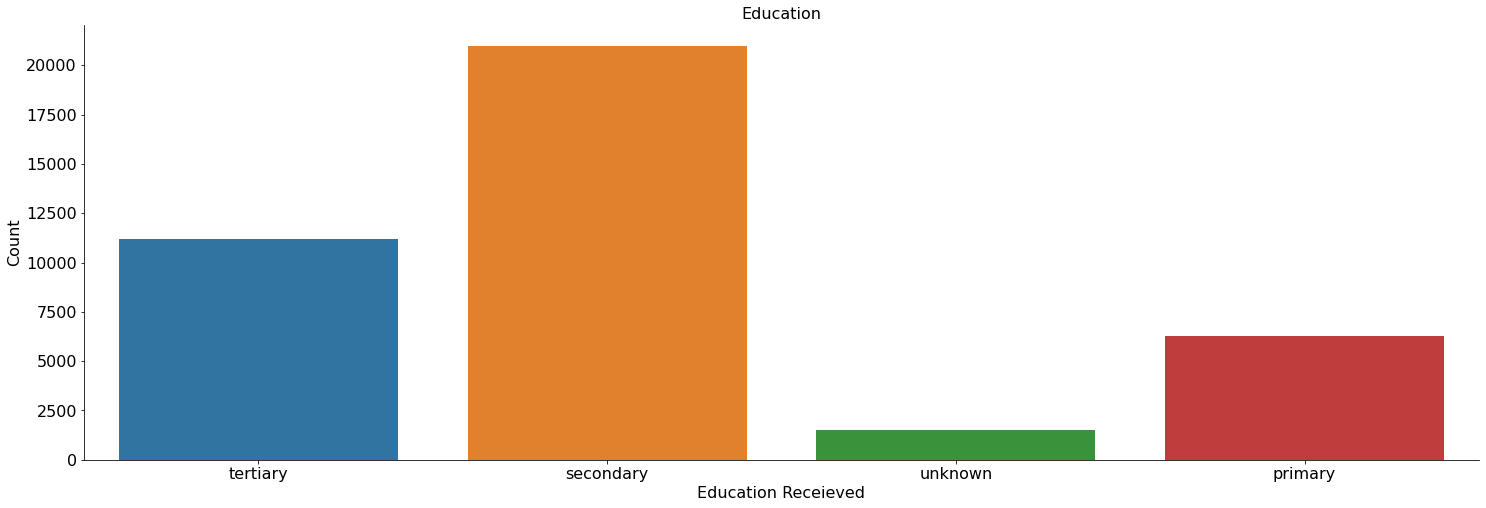

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'education', data = df[cols_cat])
ax.set_xlabel('Education Receieved', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Education', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

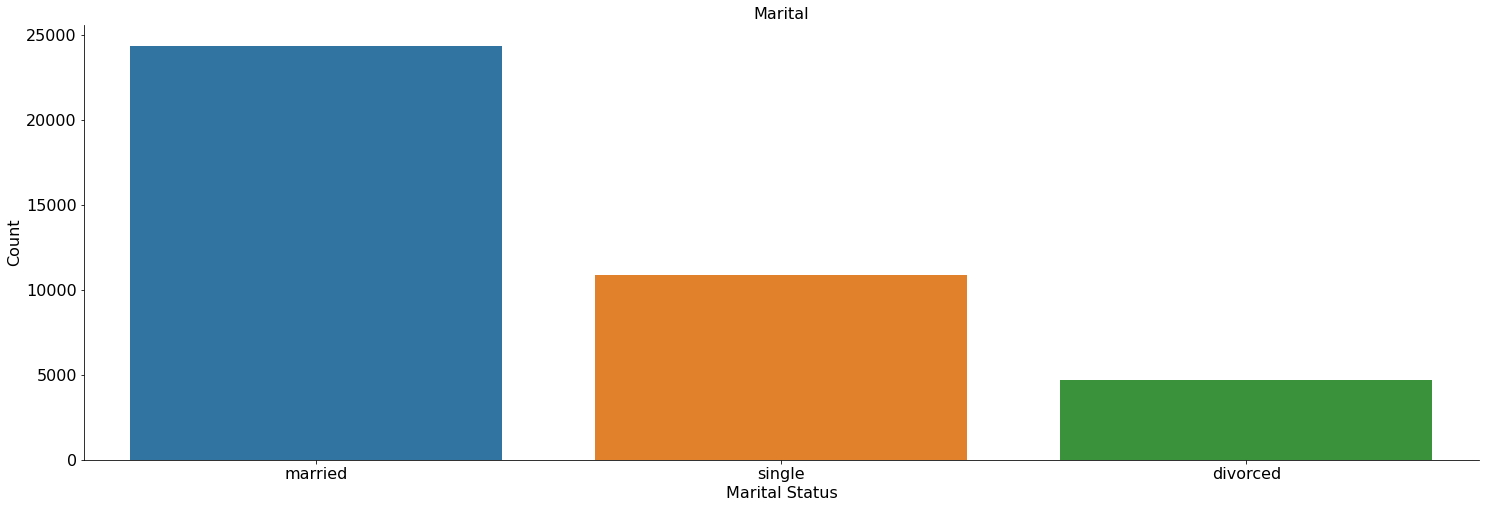

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'marital', data = df[cols_cat])
ax.set_xlabel('Marital Status', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Marital', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

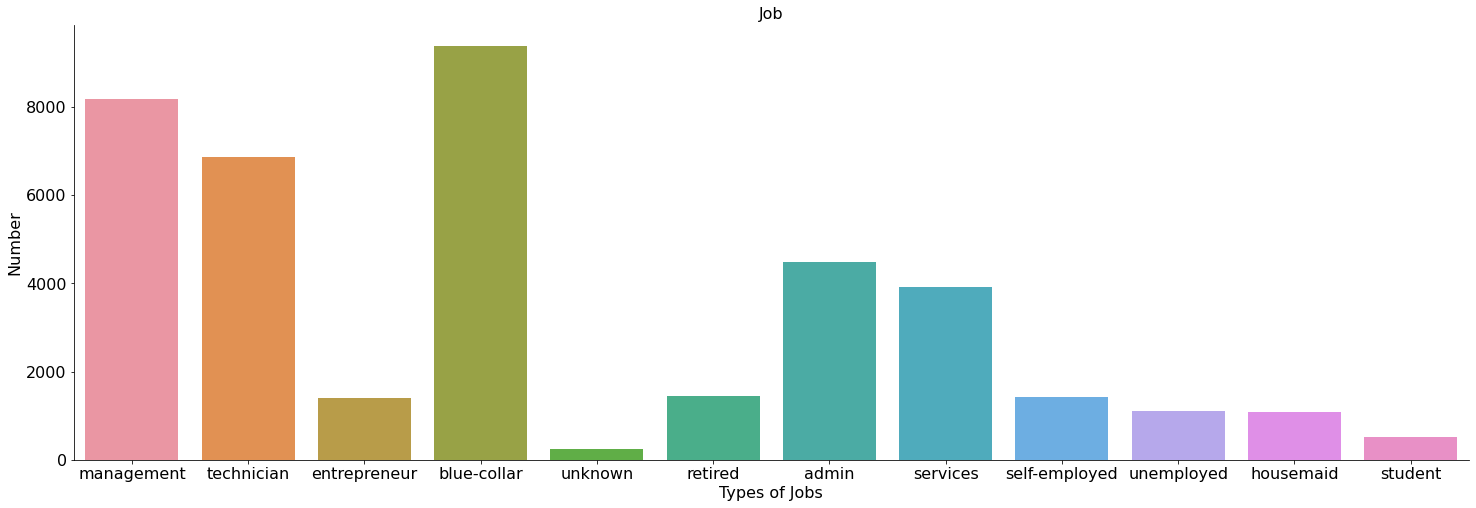

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'job', data = df[cols_cat])
ax.set_xlabel('Types of Jobs', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Job', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

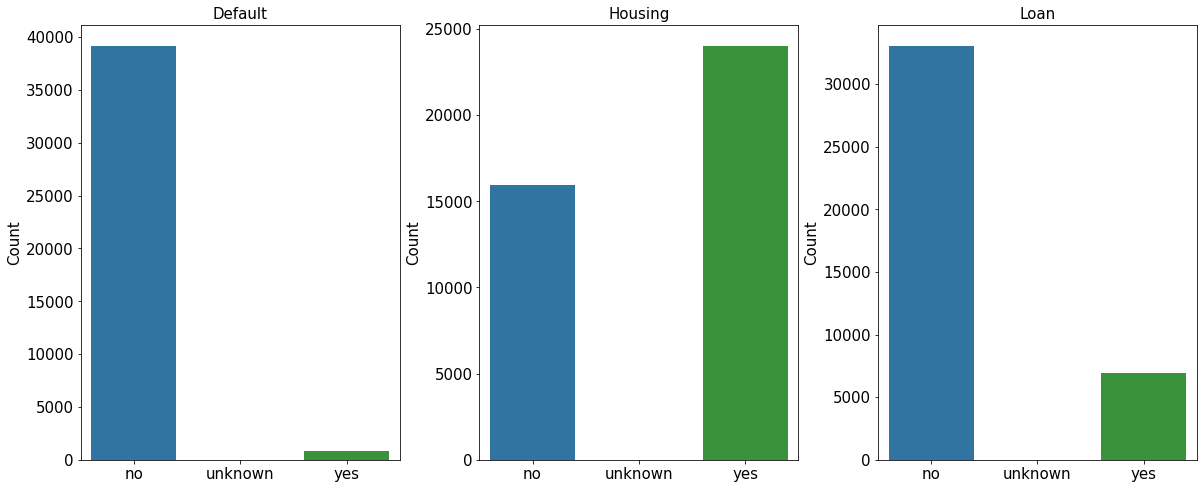

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = df[cols_cat], ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'housing', data = df[cols_cat], ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'loan', data = df[cols_cat], ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

Text(0.5, 1.0, 'Months Counts')

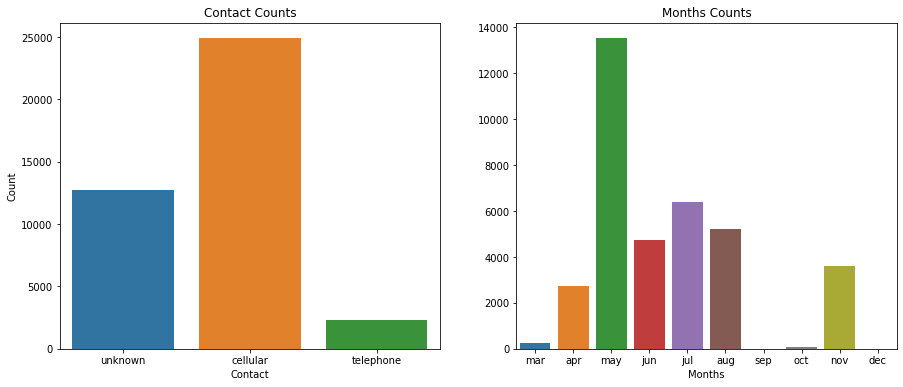

In [33]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
sns.countplot(df[cols_cat]['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(df[cols_cat]['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')



In [34]:
df = pd.concat([df,cols_new_cat], axis = 1)

In [35]:
cols_all_cat=list(cols_new_cat.columns)

In [36]:
df[cols_all_cat].head()


,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


**Summary of Feature Engineering**

In [37]:
print('Total number of features:', len(cols_all_cat+cols_num))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))


Total number of features: 44
Numerical Features: 5
Categorical Features: 39


In [40]:

cols_input = cols_num + cols_all_cat
df_data = df[cols_input + ['y']]
cols_input

['campaign',
 'duration',
 'balance',
 'day',
 'age',
 'job_admin',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_no',
 'default_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct']

In [41]:
len(cols_input)

44

In [49]:
df_data['y'] = (df_data.y == 'yes').astype('int')

In [50]:
df_data.head(6)


,campaign,duration,balance,day,age,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,y
0,1,261,2143,5,58,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,1,151,29,5,44,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,1,76,2,5,33,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,1,92,1506,5,47,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,1,198,1,5,33,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5,1,139,231,5,35,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


**Data Correlation**

In [51]:
df_data.corr()

,campaign,duration,balance,day,age,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,y
campaign,1.000000,-0.088387,-0.008137,0.165429,0.016204,-0.020156,-0.004635,-0.002619,0.002804,0.021105,-0.013881,0.004581,-0.010404,-0.008503,0.018915,-0.017052,0.017037,-0.019951,0.027962,-0.016179,0.004326,-0.027133,0.022487,0.009791,-0.012135,0.012135,0.054823,-0.054823,-0.000582,0.000582,-0.017733,0.061620,-0.012468,-0.078078,0.176446,-0.010478,-0.032070,-0.067323,0.101728,0.045657,-0.008928,-0.093437,-0.093154,-0.026013,-0.040350
duration,-0.088387,1.000000,0.014072,-0.032983,-0.036270,-0.008152,0.015951,0.000247,-0.007239,-0.010846,0.001675,0.008821,0.003569,-0.007175,-0.008469,0.017896,-0.007971,0.007237,-0.029153,0.026703,-0.007313,0.006765,-0.000303,-0.003043,0.008597,-0.008597,-0.022455,0.022455,0.003952,-0.003952,0.017624,-0.040379,0.001928,0.043029,-0.041387,-0.008212,-0.013193,0.009830,0.017831,-0.021173,-0.010308,0.014137,-0.004876,0.011327,0.461169
balance,-0.008137,0.014072,1.000000,0.011662,0.081517,-0.024774,-0.041461,0.011692,0.003044,0.072172,0.015917,0.015771,-0.033618,0.000575,-0.012655,0.010020,0.010672,-0.025910,0.023683,-0.007168,-0.020949,-0.063920,0.083069,0.011639,0.070069,-0.070069,0.049946,-0.049946,0.080596,-0.080596,0.004086,0.029116,-0.018851,0.017595,0.006746,-0.001729,-0.006996,-0.028811,-0.069231,0.037525,0.017201,-0.061806,0.138829,0.026811,0.030232
day,0.165429,-0.032983,0.011662,1.000000,-0.011689,-0.008858,-0.035006,-0.003629,0.005355,0.026526,-0.002787,0.005080,-0.009461,-0.011183,0.031902,-0.005475,-0.009526,-0.004055,0.005243,-0.002806,-0.029240,-0.010139,0.033773,0.002749,-0.006287,0.006287,0.050622,-0.050622,-0.005838,0.005838,0.034320,0.037242,-0.054363,0.041380,0.044390,-0.011766,-0.315910,0.270347,0.163457,-0.211740,-0.013673,-0.046278,0.113071,0.041480,-0.006420
age,0.016204,-0.036270,0.081517,-0.011689,1.000000,-0.047348,-0.028956,0.027956,0.084920,-0.005302,0.333164,0.001712,-0.057227,-0.155146,-0.058308,0.008052,0.043904,0.161989,0.265630,-0.408589,0.177944,-0.095671,-0.068986,0.073293,0.014857,-0.014857,0.179606,-0.179606,-0.000041,0.000041,-0.068206,0.120689,0.010386,-0.031056,0.088125,-0.005046,-0.006882,-0.020452,0.015661,0.085656,0.004259,-0.129909,0.038068,0.002637,-0.020273
job_admin,-0.020156,-0.008152,-0.024774,-0.008858,-0.047348,1.000000,-0.196678,-0.067786,-0.059379,-0.179939,-0.068582,-0.068011,-0.116939,-0.040932,-0.161527,-0.059855,-0.027312,0.036940,-0.064991,0.044443,-0.109145,0.217446,-0.149282,-0.009743,0.009384,-0.009384,-0.039440,0.039440,-0.025195,0.025195,-0.009522,-0.001399,0.010602,0.022478,-0.083899,-0.002009,0.002956,0.003847,0.018822,-0.006272,0.015923,0.034907,-0.006716,0.012477,0.008083
job_blue-collar,-0.004635,0.015951,-0.041461,-0.035006,-0.028956,-0.196678,1.000000,-0.105624,-0.092525,-0.280381,-0.106864,-0.105974,-0.182215,-0.063781,-0.251692,-0.093266,-0.042557,-0.069165,0.125618,-0.087522,0.357376,0.025941,-0.328668,0.024560,-0.004706,0.004706,-0.156122,0.156122,-0.005674,0.005674,-0.115425,0.006448,0.116781,0.023309,-0.118678,-0.003435,-0.040985,-0.036275,-0.022815,0.022013,-0.035760,0.147611,-0.054234,-0.008935,-0.032859
job_entrepreneur,-0.002619,0.000247,0.011692,-0.003629,0.027956,-0.067786,-0.105624,1.000000,-0.031889,-0.096634,-0.036831,-0.036524,-0.062801,-0.021982,-0.086747,-0.032144,-0.014667,-0.000406,0.044941,-0.048960,-0.016522,-0.062648,0.076927,0.014314,-0.025645,0.025645,-0.003303,0.003303,-0.038244,0.038244,0.005294,-0.006114,-0.002439,-0.015902,-0.048468,-0.003440,0.001374,-0.00

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

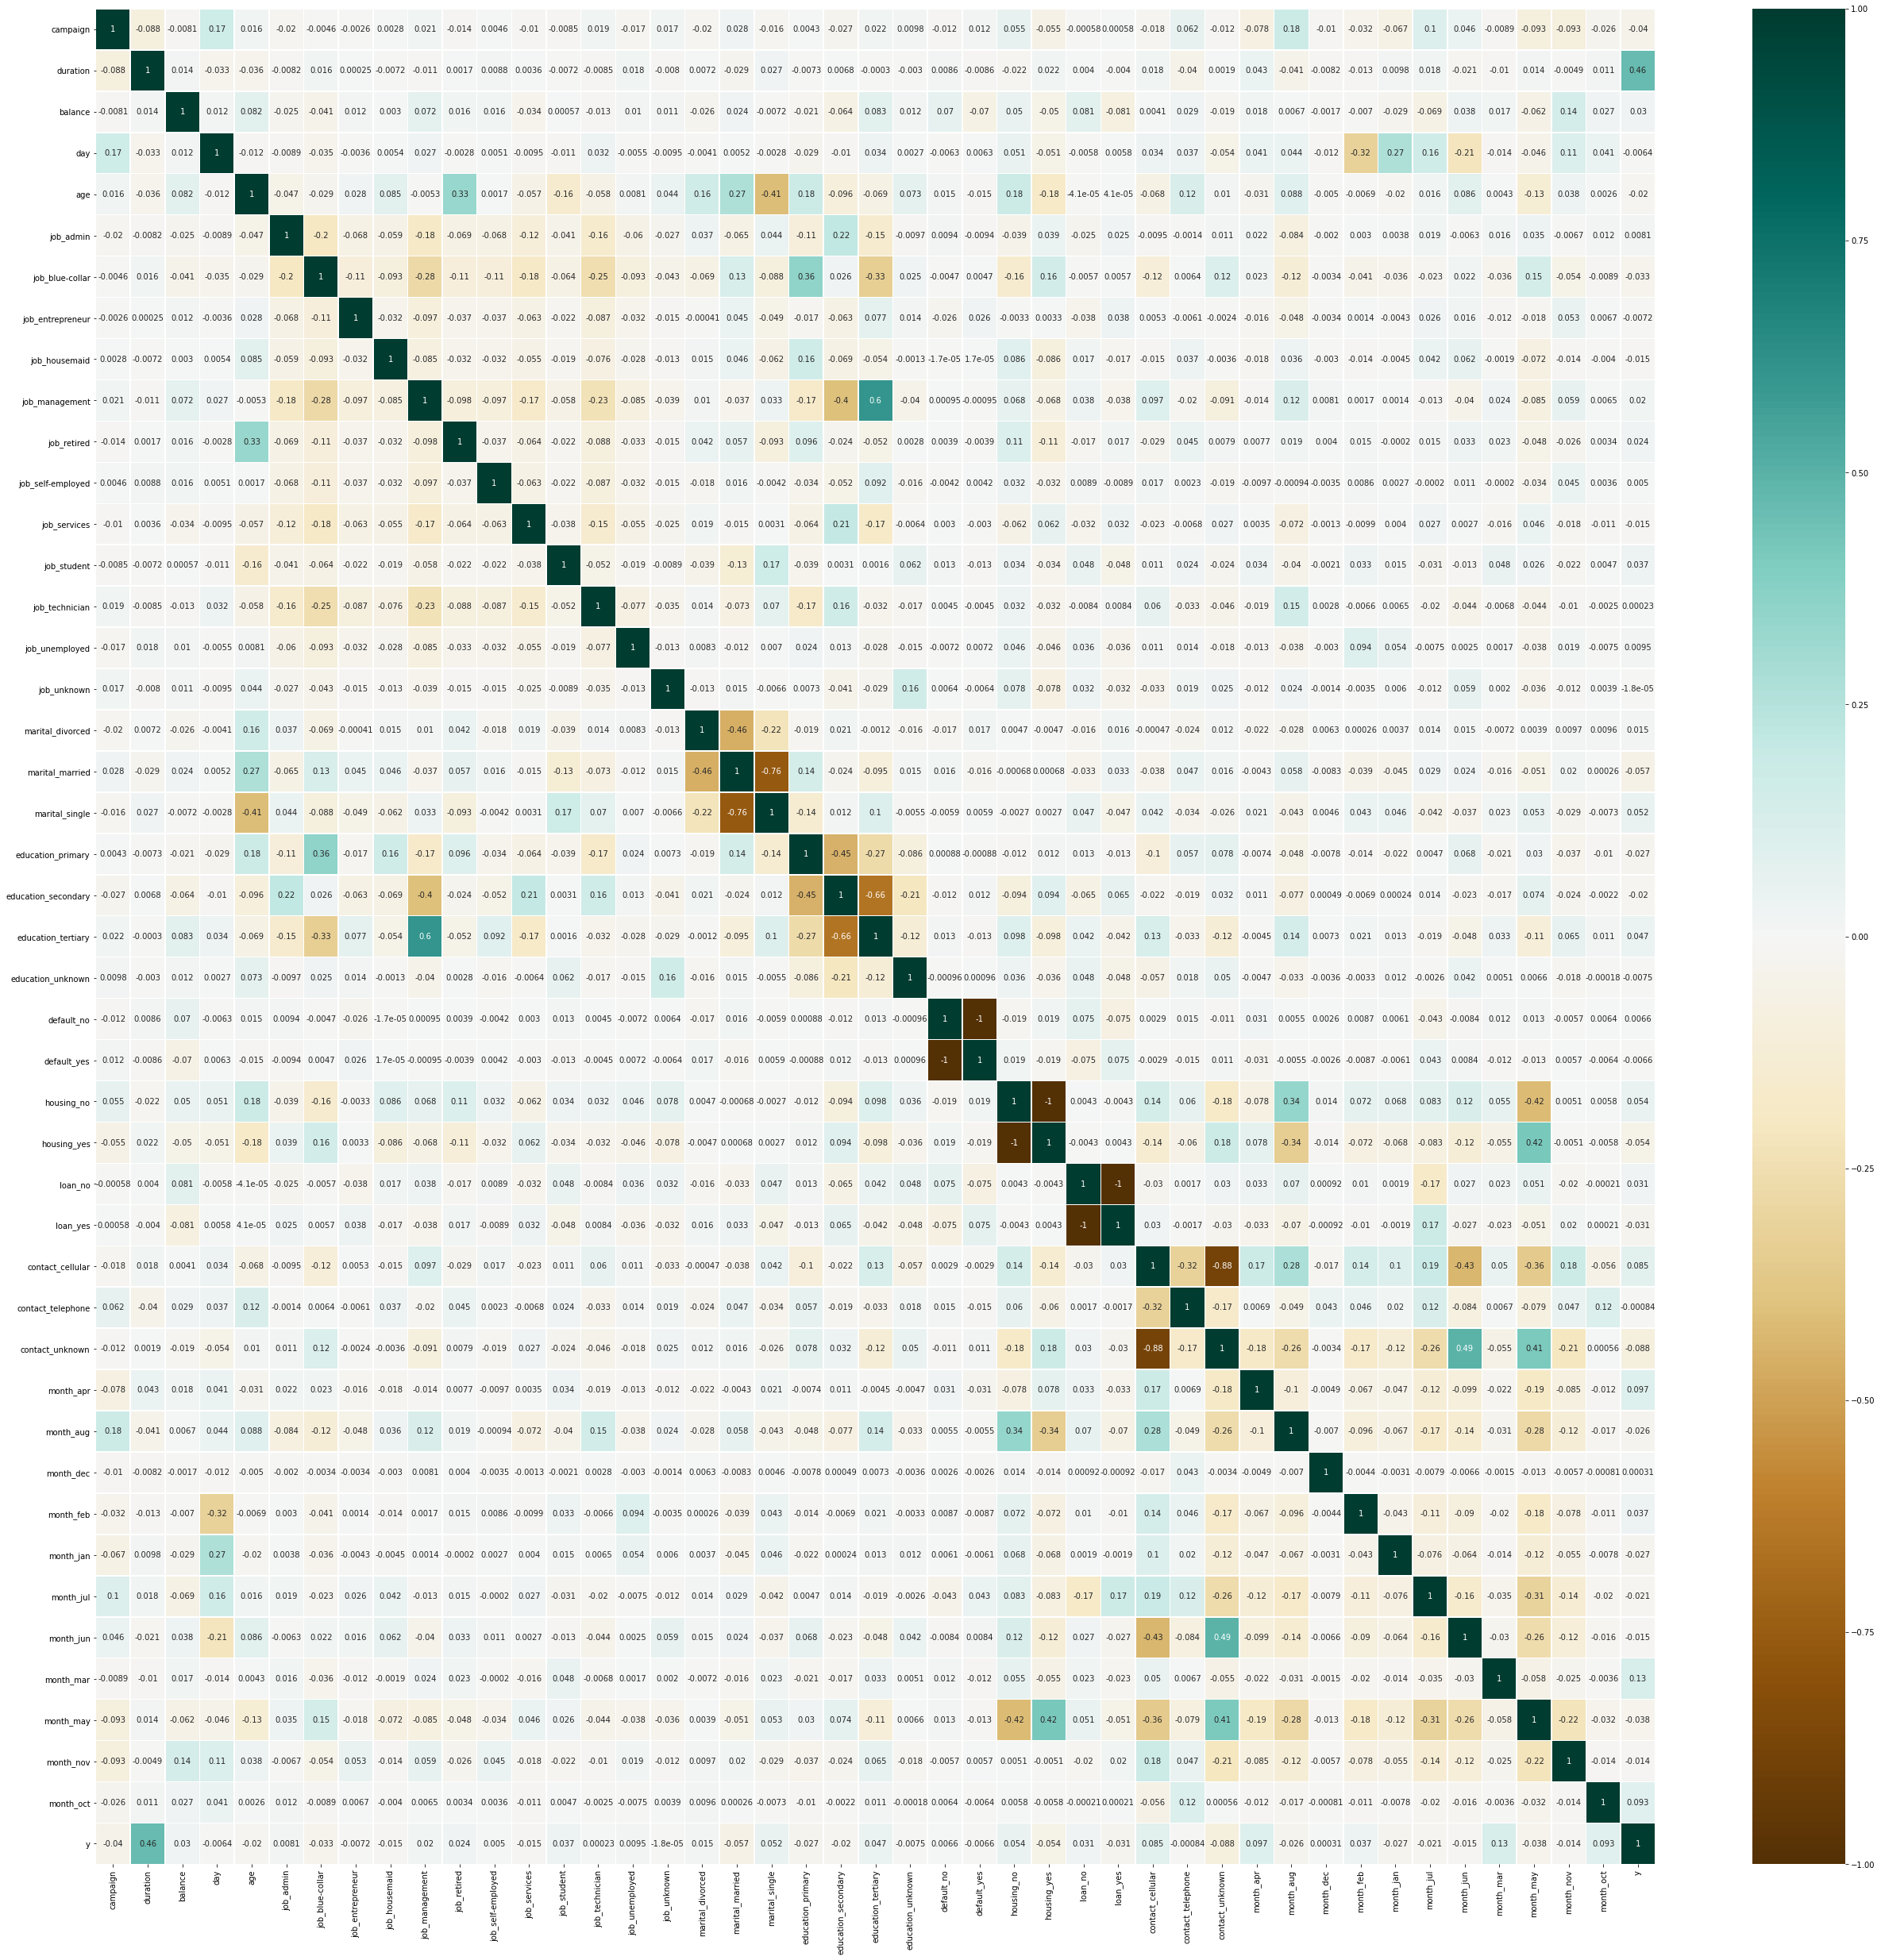

In [52]:
corr_matrix = df_data.corr()
plt.figure(figsize=(44, 43))
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.5)

# Training-Testing

**Train-Test**

In [53]:
#shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [54]:

df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


In [55]:
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

In [56]:
#use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

In [63]:

def calc_prevalence(y_actual):
  return (sum(y_actual)/len(y_actual))

In [64]:
# check the prevalence of each 
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.y.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.y.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.y.values)))

Test prevalence(n = 6000):0.071
Valid prevalence(n = 6000):0.076
Train all prevalence(n = 28000):0.072


In [67]:
# split the training data into positive and negative
rows_pos = df_train_all.y == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.y.values)))

# split the validation into positive and negative
rows_pos = df_valid.y == 1
df_valid_pos = df_valid.loc[rows_pos]
df_valid_neg = df_valid.loc[~rows_pos]

# merge the balanced data
df_valid = pd.concat([df_valid_pos, df_valid_neg.sample(n = len(df_valid_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_valid = df_valid.sample(n = len(df_valid), random_state = 42).reset_index(drop = True)

print('Valid balanced prevalence(n = %d):%.3f'%(len(df_valid), calc_prevalence(df_train.y.values)))

# split the test into positive and negative
rows_pos = df_test.y == 1
df_test_pos = df_test.loc[rows_pos]
df_test_neg = df_test.loc[~rows_pos]

# merge the balanced data
df_test = pd.concat([df_test_pos, df_test_neg.sample(n = len(df_test_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_test = df_test.sample(n = len(df_test), random_state = 42).reset_index(drop = True)

print('Test balanced prevalence(n = %d):%.3f'%(len(df_test), calc_prevalence(df_train.y.values)))

Train balanced prevalence(n = 4030):0.500
Valid balanced prevalence(n = 912):0.500
Test balanced prevalence(n = 850):0.500


In [69]:
import os
newpath = '/content/file' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [71]:
df_train_all.to_csv('/content/file/df_train_all.csv',index=False)
df_train.to_csv('/content/file/df_train.csv',index=False)
df_valid.to_csv('/content/file/df_valid.csv',index=False)
df_test.to_csv('/content/file/df_test.csv',index=False)

In [73]:
# create the X and y matrices
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['y'].values
y_valid = df_valid['y'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (28000, 44)
Training shapes: (4030, 44) (4030,)
Validation shapes: (912, 44) (912,)


*   Standard Scaler



In [74]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [76]:
import pickle
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [77]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

In [78]:

# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

**Model Selection**

In [79]:

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    f1 = 2 * (precision * recall) / (precision + recall)
   
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print('f1:%.3f'%f1)
    print(' ')
    return auc, accuracy, recall, precision, specificity, f1

In [81]:
thresh = 0.5

**Logistic Regression**

In [83]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity, lr_train_f1= print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity, lr_valid_f1= print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.936
accuracy:0.868
recall:0.865
precision:0.871
specificity:0.871
prevalence:0.500
f1:0.868
 
Validation:
AUC:0.933
accuracy:0.853
recall:0.855
precision:0.852
specificity:0.851
prevalence:0.500
f1:0.853
 


**Tree Based Algorithms**

In [85]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier(random_state = 42)
Rf.fit(X_train_tf, y_train)

y_train_preds = Rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = Rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
Rf_train_auc, Rf_train_accuracy, Rf_train_recall, \
    Rf_train_precision, Rf_train_specificity, Rf_train_f1= print_report(y_train,y_train_preds, thresh)
print('Validation:')
Rf_valid_auc, Rf_valid_accuracy, Rf_valid_recall, \
    Rf_valid_precision, Rf_valid_specificity, Rf_valid_f1= print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.500
f1:1.000
 
Validation:
AUC:0.944
accuracy:0.884
recall:0.917
precision:0.860
specificity:0.846
prevalence:0.500
f1:0.887
 


In [87]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
Dc=DecisionTreeClassifier(random_state = 42)
Rf.fit(X_train_tf, y_train)

y_train_preds = Rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = Rf.predict_proba(X_valid_tf)[:,1]

print('Decision Tree ')
print('Training:')
Dc_train_auc, Dc_train_accuracy, Dc_train_recall, \
    Dc_train_precision, Dc_train_specificity, Dc_train_f1= print_report(y_train,y_train_preds, thresh)
print('Validation:')
Rf_valid_auc, Rf_valid_accuracy, Rf_valid_recall, \
    Dc_valid_precision, Dc_valid_specificity, Dc_valid_f1= print_report(y_valid,y_valid_preds, thresh)

Decision Tree 
Training:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.500
f1:1.000
 
Validation:
AUC:0.944
accuracy:0.884
recall:0.917
precision:0.860
specificity:0.846
prevalence:0.500
f1:0.887
 


Random forest and desicion tree overfited.

**Boosting Algorithm**

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity, gbc_train_f1 = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity, gbc_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:0.997
accuracy:0.978
recall:0.982
precision:0.974
specificity:0.974
prevalence:0.500
f1:0.978
 
Validation:
AUC:0.918
accuracy:0.852
recall:0.866
precision:0.842
specificity:0.838
prevalence:0.500
f1:0.854
 


**Feature importance**

For logistic regression

In [92]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [93]:
feature_importances

,importance
duration,2.016815
contact_cellular,0.453506
month_jun,0.449127
month_feb,0.296504
month_apr,0.295749
month_mar,0.281910
day,0.246710
month_oct,0.203262
housing_no,0.201155
contact_telephone,0.194155


For boosting classifier

In [95]:
feature_importances = pd.DataFrame(gbc.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [96]:
feature_importances

,importance
duration,0.584871
month_mar,0.057000
month_apr,0.052954
day,0.052941
balance,0.044079
housing_yes,0.027277
month_feb,0.023621
contact_unknown,0.023089
month_oct,0.022041
age,0.021076


GBC and Logistic Regression was the best model.